In [5]:
# Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset (predicts disease progression from features like BMI, BP)
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target  # Continuous target: disease progression measure

print(X.head())
print(f"Dataset shape: {X.shape}")

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Dataset shape: (442, 10)


In [6]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients and intercept
print(f"Coefficients: {model.coef_[:5]}...")  # First 5 features
print(f"Intercept: {model.intercept_:.2f}")


Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588]...
Intercept: 151.35


In [7]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error: 2900.19
R² Score: 0.453


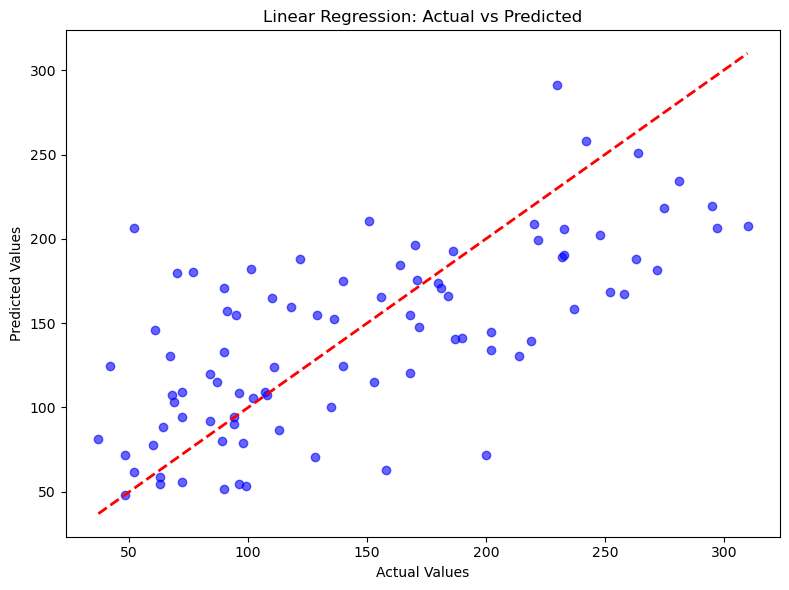

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()


In [9]:
# Polynomial Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load and select BMI feature only for visualization clarity
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
X_bmi = X[['bmi']].values  # Single feature for polynomial demo

print(f"BMI range: {X_bmi.min():.1f} to {X_bmi.max():.1f}")


BMI range: -0.1 to 0.2


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Pipeline: PolynomialFeatures -> LinearRegression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

print(f"Polynomial R²: {r2_score(y_test, y_poly_pred):.3f}")
print(f"Polynomial RMSE: {np.sqrt(mean_squared_error(y_test, y_poly_pred)):.1f}")


Polynomial R²: 0.229
Polynomial RMSE: 63.9


Linear R²: 0.233


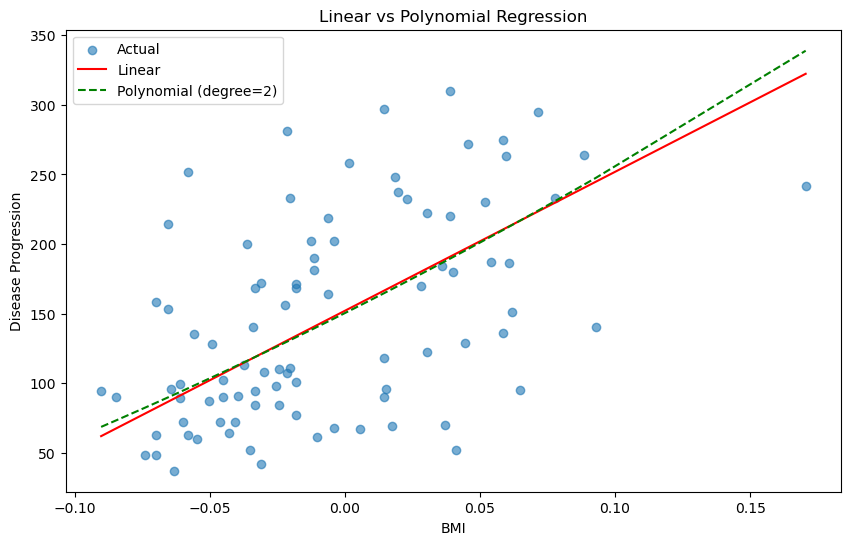

In [11]:
# Linear baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

print(f"Linear R²: {r2_score(y_test, y_linear_pred):.3f}")

# Plot comparison
sort_idx = X_test.flatten().argsort()
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')
plt.plot(X_test[sort_idx], y_linear_pred[sort_idx], 'r-', label='Linear')
plt.plot(X_test[sort_idx], y_poly_pred[sort_idx], 'g--', label='Polynomial (degree=2)')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Linear vs Polynomial Regression')
plt.show()


In [12]:
# Multiple Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Full diabetes dataset with 10 features
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

print(f"Features: {X.columns.tolist()}")
print(f"Shape: {X.shape}")
print(X.head())


Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape: (442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression (same class as simple linear)
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients show feature impact
coef_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df)
print(f"Intercept: {model.intercept_:.2f}")


  Feature  Coefficient
4      s1  -931.488846
8      s5   736.198859
2     bmi   542.428759
5      s2   518.062277
3      bp   347.703844
7      s4   275.317902
1     sex  -241.964362
6      s3   163.419983
9      s6    48.670657
0     age    37.904021
Intercept: 151.35


MSE: 2900.19
R²: 0.453


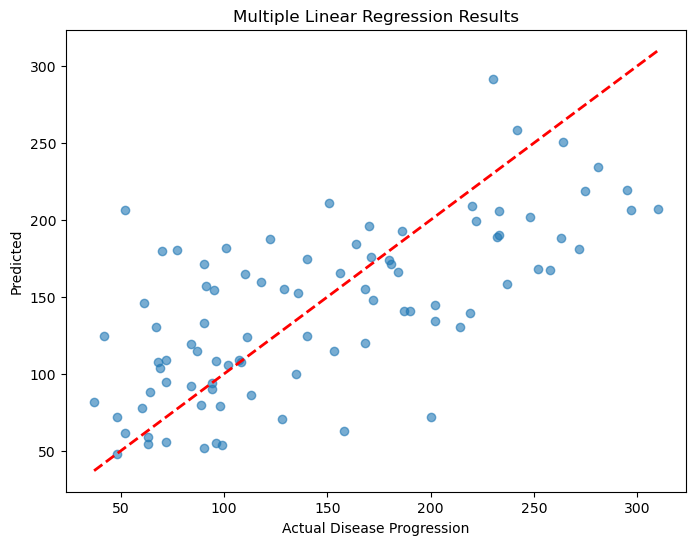

In [14]:
# Predictions and metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

# Actual vs predicted scatter (multi-feature)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression Results')
plt.show()


<Figure size 1000x600 with 0 Axes>

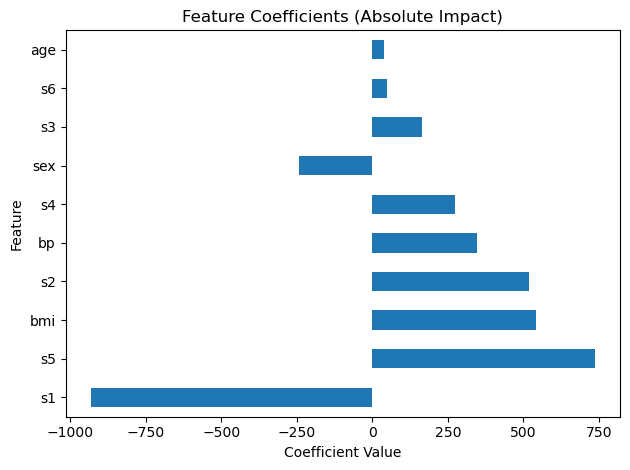

In [15]:
plt.figure(figsize=(10, 6))
coef_df.plot(x='Feature', y='Coefficient', kind='barh', legend=False)
plt.title('Feature Coefficients (Absolute Impact)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()
